In [ ]:
# Imports
import torch
import torch_cluster
from torch_geometric.nn import Node2Vec
from torch_geometric.datasets import Planetoid
from torchsummary import summary
from tqdm.notebook import tqdm

import ogb
# print(ogb.__version__)

import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

import time
import json
import copy
import random
import os.path as osp
from pprint import pprint

import importlib

import training
importlib.reload(training)
import graph_vis
importlib.reload(graph_vis)
import graph_creation
importlib.reload(graph_creation)
import utils
importlib.reload(utils)

from ogb.nodeproppred import Evaluator
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
device = utils.set_seeds_and_device() # maybe return seed?

Using device: cpu
Random seed set to: 42


In [ ]:
# data = graph_lib.load_dataset_cora()
# TODO: make the floe one function - into files like utils etc
# TODO: create grpahs from distr and clustercoeffs and test on those too 
# make the four test autmatickly run one after the other  
graph_community = graph_creation.graph_with_communities_generator_sb(15,80)# 15,80
graph_vis.print_graph_info_cluster(graph_community)
# print(nx.average_clustering(graph_community))

graph_hierarchy = graph_creation.graph_with_hierarchy_generator(2, 10, False) # 2, 10
graph_vis.print_graph_info_cluster(graph_hierarchy)

# print(nx.average_clustering(graph_hierarchy))

# garph_vis.graph_visualizer(graph_community, layout='spring')
# graph_vis.graph_visualizer(graph_hierarchy, layout='bfs')  

data_community = utils.nx_to_pytorch_data_converter(graph_community)
data_hierarchy = utils.nx_to_pytorch_data_converter(graph_hierarchy)

# data = graph_lib.create_masks(data_community)
data_h = utils.create_masks(data_hierarchy)
data_c = utils.create_masks(data_community)


data_list=[data_c, data_h]
# data_list=[data_c]

 => Using default probabilities
Graph loaded from Graph named 'stochastic_block_model' with 1200 nodes and 30209 edges
Type:  <class 'networkx.classes.graph.Graph'>
Graph named 'stochastic_block_model' with 1200 nodes and 30209 edges
Number of nodes:  1200
Number of edges:  30209
Average node degree:  50.348333333333336
Has isolated nodes:  0
Has self loops:  0
Is directed:  False
Graph statistics:
Number of connected components: 1
Number of nodes in largest component: 1200
Number of nodes: 1200
Number of edges: 30209
Average Clustering Coefficient: 0.3069360388790099
Average Shortest Path (Largest Component): 2.340036141228802
Number of Connected Components: 1
2047
Graph loaded from Graph with 2047 nodes and 2046 edges
Type:  <class 'networkx.classes.graph.Graph'>
Graph with 2047 nodes and 2046 edges
Number of nodes:  2047
Number of edges:  2046
Average node degree:  1.9990229604298975
Has isolated nodes:  0
Has self loops:  0
Is directed:  False
Graph statistics:
Number of connected 

In [10]:
parameter_dicts = training.create_parameters_dict()


Running with q = {'embedding_dim': 128, 'walk_length': 20, 'context_size': 10, 'walks_per_node': 20, 'num_negative_samples': 1, 'p': 1, 'q': 200, 'sparse': True}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 6 epochs...


Epoch: 001, Loss: 9.0847, Acc: 0.1472, Duration: 14.23s
    New best model saved with accuracy: 0.1472


Epoch: 002, Loss: 7.5342, Acc: 0.2833, Duration: 15.43s
    New best model saved with accuracy: 0.2833


Epoch: 003, Loss: 6.1973, Acc: 0.4500, Duration: 13.58s
    New best model saved with accuracy: 0.4500


Epoch: 004, Loss: 5.1520, Acc: 0.6778, Duration: 12.58s
    New best model saved with accuracy: 0.6778


Epoch: 005, Loss: 4.4336, Acc: 0.8500, Duration: 12.28s
    New best model saved with accuracy: 0.8500


Epoch: 006, Loss: 3.8887, Acc: 0.9389, Duration: 12.88s
    New best model saved with accuracy: 0.9389

Training finished.
Total elapsed time: 81.03 seconds
Best test accuracy: 0.9389
Best model state saved to './training_data/models/node2vec_'


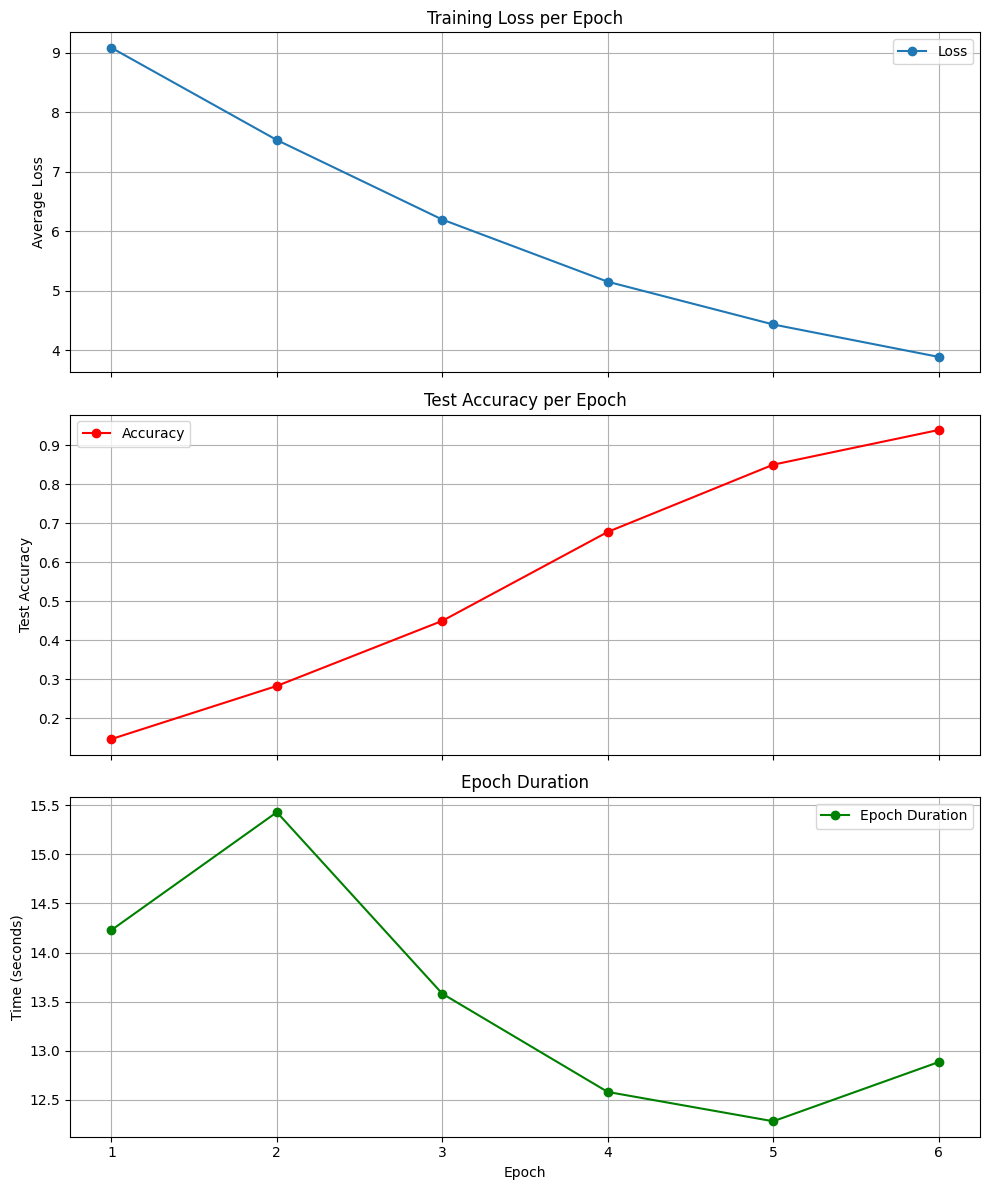

Running with p = {'embedding_dim': 128, 'walk_length': 20, 'context_size': 10, 'walks_per_node': 20, 'num_negative_samples': 1, 'p': 200, 'q': 1, 'sparse': True}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 6 epochs...


Epoch: 001, Loss: 9.4051, Acc: 0.1111, Duration: 15.30s
    New best model saved with accuracy: 0.1111


Epoch: 002, Loss: 8.0623, Acc: 0.1556, Duration: 13.89s
    New best model saved with accuracy: 0.1556


Epoch: 003, Loss: 6.9010, Acc: 0.2278, Duration: 13.95s
    New best model saved with accuracy: 0.2278


Epoch: 004, Loss: 5.8973, Acc: 0.3306, Duration: 12.63s
    New best model saved with accuracy: 0.3306


Epoch: 005, Loss: 5.0549, Acc: 0.4556, Duration: 14.71s
    New best model saved with accuracy: 0.4556


Epoch: 006, Loss: 4.3713, Acc: 0.6056, Duration: 12.89s
    New best model saved with accuracy: 0.6056

Training finished.
Total elapsed time: 83.41 seconds
Best test accuracy: 0.6056
Best model state saved to './training_data/models/node2vec_'


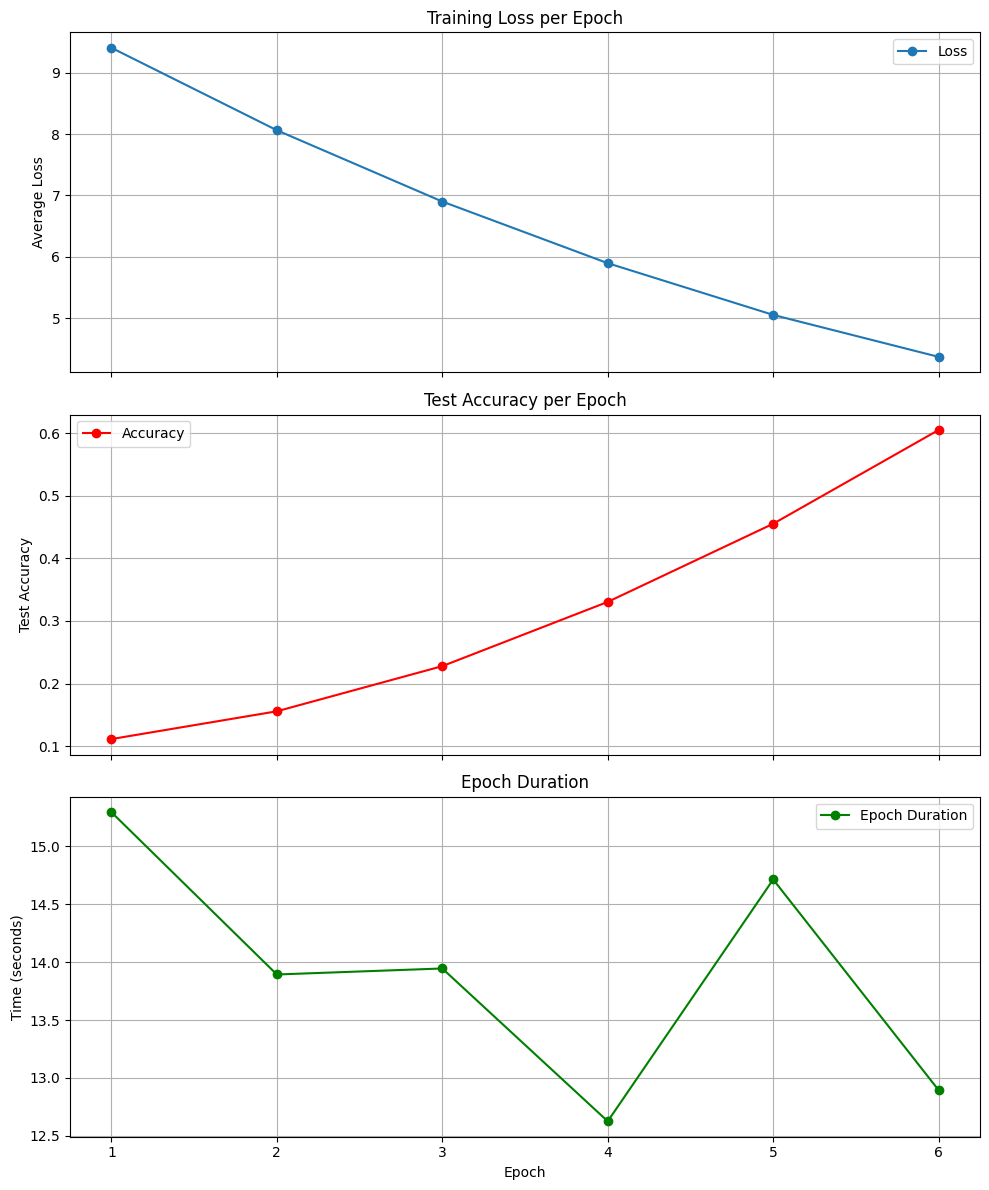

Running with q = {'embedding_dim': 128, 'walk_length': 20, 'context_size': 10, 'walks_per_node': 20, 'num_negative_samples': 1, 'p': 1, 'q': 200, 'sparse': True}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 6 epochs...


Epoch: 001, Loss: 7.0355, Acc: 0.4130, Duration: 18.64s
    New best model saved with accuracy: 0.4130


Epoch: 002, Loss: 5.2896, Acc: 0.4211, Duration: 18.43s
    New best model saved with accuracy: 0.4211


Epoch: 003, Loss: 4.5287, Acc: 0.4244, Duration: 18.46s
    New best model saved with accuracy: 0.4244


Epoch: 004, Loss: 4.0808, Acc: 0.4276, Duration: 19.02s
    New best model saved with accuracy: 0.4276


Epoch: 005, Loss: 3.7213, Acc: 0.4244, Duration: 19.86s


Epoch: 006, Loss: 3.3969, Acc: 0.4390, Duration: 20.24s
    New best model saved with accuracy: 0.4390

Training finished.
Total elapsed time: 114.68 seconds
Best test accuracy: 0.4390
Best model state saved to './training_data/models/node2vec_'


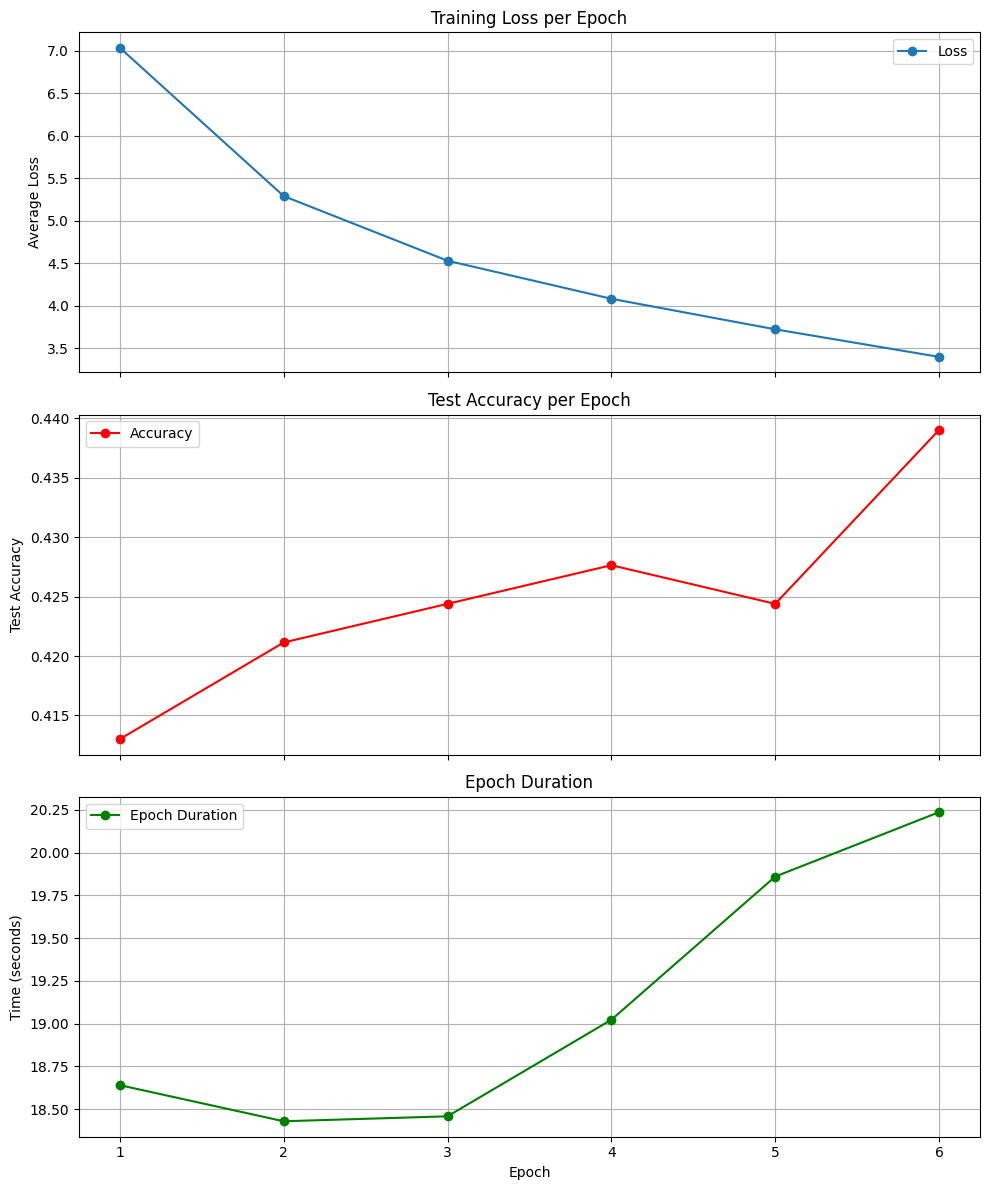

Running with p = {'embedding_dim': 128, 'walk_length': 20, 'context_size': 10, 'walks_per_node': 20, 'num_negative_samples': 1, 'p': 200, 'q': 1, 'sparse': True}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 6 epochs...


Epoch: 001, Loss: 7.6962, Acc: 0.4130, Duration: 23.49s
    New best model saved with accuracy: 0.4130


Epoch: 002, Loss: 5.6782, Acc: 0.4049, Duration: 24.01s


Epoch: 003, Loss: 4.8572, Acc: 0.4000, Duration: 20.09s


Epoch: 004, Loss: 4.3284, Acc: 0.4016, Duration: 21.60s


Epoch: 005, Loss: 3.8717, Acc: 0.4081, Duration: 20.83s


Epoch: 006, Loss: 3.4506, Acc: 0.4049, Duration: 24.20s

Training finished.
Total elapsed time: 134.23 seconds
Best test accuracy: 0.4130
Best model state saved to './training_data/models/node2vec_'


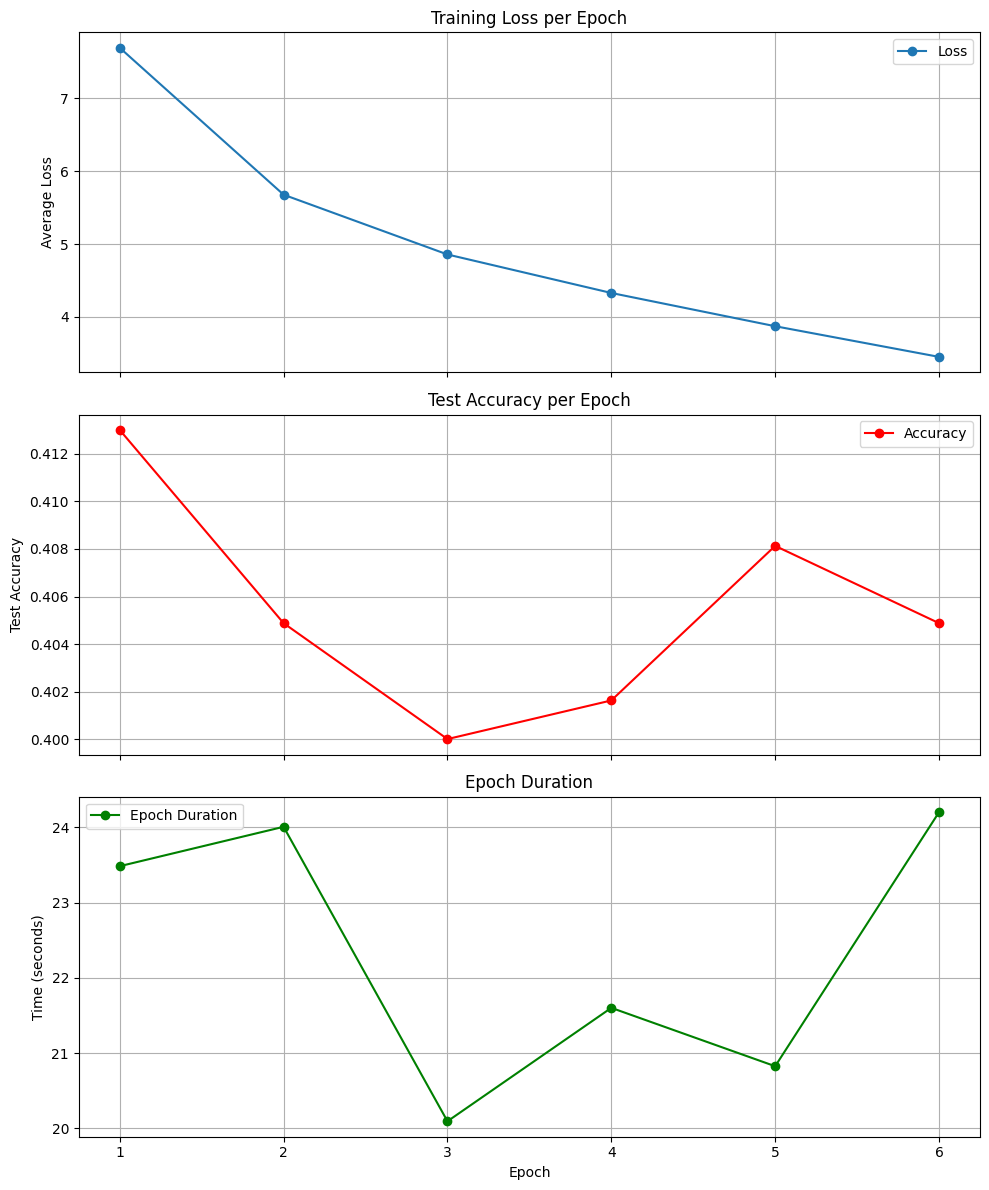

In [11]:
for data in data_list:
    for key, value in parameter_dicts.items():
        print(f"Running with {key} = {value}")
        # data = graph_lib.create_masks(data)
        model = training.model_init(value,data)
        
        loader, optimizer = training.set_loader_and_optimizer(model)
        num_training_epochs = 6 # Or 201, etc.

        best_state, training_history = training.model_training_n2v(
            model,
            value,
            data,
            loader,
            optimizer,
            num_training_epochs,
            device,
            model_save_path='./training_data/models/node2vec_' # Example save path
        )
        

The node feature representations are input to a one-vs-rest logistic regression classifier with L2 regularization.

In [12]:
model.eval()
with torch.no_grad():
    embeddings = model().cpu().numpy()  # shape: [num_nodes, embedding_dim]

labels = data.y.cpu().numpy()


# Split into train and test sets using masks
train_embeddings = embeddings[data.train_mask.cpu().numpy()]
train_labels = labels[data.train_mask.cpu().numpy()]

test_embeddings = embeddings[data.test_mask.cpu().numpy()]
test_labels = labels[data.test_mask.cpu().numpy()]

# Train logistic regression
clf = LogisticRegression(max_iter=500)
clf.fit(train_embeddings, train_labels)

# Predict and evaluate
preds = clf.predict(test_embeddings)
acc = accuracy_score(test_labels, preds)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.4130


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assume embeddings, data.train_mask, data.test_mask, and data.y are already defined

# Get train/test splits
train_embeddings = embeddings[data.train_mask.cpu().numpy()]
train_labels = data.y.cpu().numpy()[data.train_mask.cpu().numpy()]

test_embeddings = embeddings[data.test_mask.cpu().numpy()]
test_labels = data.y.cpu().numpy()[data.test_mask.cpu().numpy()]

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_embeddings, train_labels)

# Predict and evaluate
preds = rf.predict(test_embeddings)
acc = accuracy_score(test_labels, preds)
print(f"Random Forest Test Accuracy: {acc:.4f}")

Random Forest Test Accuracy: 0.4894


In [14]:
from xgboost import XGBClassifier

# Assume embeddings, data.train_mask, data.test_mask, and data.y are already defined

# Get train/test splits
train_embeddings = embeddings[data.train_mask.cpu().numpy()]
train_labels = data.y.cpu().numpy()[data.train_mask.cpu().numpy()]

test_embeddings = embeddings[data.test_mask.cpu().numpy()]
test_labels = data.y.cpu().numpy()[data.test_mask.cpu().numpy()]

# Train XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(train_embeddings, train_labels)

# Predict and evaluate
preds = xgb.predict(test_embeddings)
acc = accuracy_score(test_labels, preds)
print(f"XGBoost Test Accuracy: {acc:.4f}")

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8 9], got [ 2  3  4  5  6  7  8  9 10 11]

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

labels = data.y.cpu().numpy()
embeddings = embeddings  # already computed

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(sss.split(embeddings, labels))

train_embeddings = embeddings[train_idx]
train_labels = labels[train_idx]
test_embeddings = embeddings[test_idx]
test_labels = labels[test_idx]

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(train_embeddings, train_labels)

preds = xgb.predict(test_embeddings)
acc = accuracy_score(test_labels, preds)
print(f"XGBoost Test Accuracy: {acc:.4f}")

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14], got [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

In [ ]:
# TODO: save previous best result with model? check out a library for this?
# model,model_init_params = graph_lib.model_init_from_file('./training_data/models/node2vec_embedding_dim_128_walk_length_20_context_size_10_walks_per_node_20_num_negative_samples_1_p_200_q_1_sparse_True.json', data)

In [ ]:
model = training.model_init(
    model_init_params_p,
    data
)

loader, optimizer = training.set_loader_and_optimizer(model)

In [ ]:
num_training_epochs = 6 # Or 201, etc.

best_state, training_history = training.model_training_n2v(
    model,
    model_init_params_q,
    data,
    loader,
    optimizer,
    num_training_epochs,
    device,
    model_save_path='./training_data/models/node2vec_' # Example save path
)

Starting training for 6 epochs...


Epoch: 001, Loss: 7.5788, Acc: 0.4049, Duration: 13.21s
    New best model saved with accuracy: 0.4049


Epoch: 002, Loss: 5.6322, Acc: 0.4130, Duration: 13.21s
    New best model saved with accuracy: 0.4130


Epoch: 003, Loss: 4.8283, Acc: 0.4098, Duration: 15.97s


Epoch: 004, Loss: 4.2908, Acc: 0.4163, Duration: 16.26s
    New best model saved with accuracy: 0.4163


KeyboardInterrupt: 